In [1]:
%cd ..
%cd ..

/home/wu/repo/gesture-wgan/tools
/home/wu/repo/gesture-wgan


In [2]:
import datasets
import models
from tools.JsonConfig import JsonConfig
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# Experiment under cl34, for continuity loss 1 and 0, 0.5
# cl0_hparams_path = "hparams/wgan/closs-hip/cl34-closs0-hip.json"
# cl0_chkpt_path = "results/log_20210805_1943/chkpt/generator_232k.pt"
cl1_hparams_path = "hparams/wgan/closs-hip/cl34-closs1-hip.json"
cl1_chkpt_path = "results/log_20211104_1719/chkpt/generator_232k.pt"
# cl05_hparams_path = "hparams/wgan/closs-hip/cl34-closs05-hip.json"
# cl05_chkpt_path = "results/log_20210810_1503/chkpt/generator_232k.pt"
# cl01_hparams_path = "hparams/wgan/closs-hip/cl34-closs01-hip.json"
# cl01_chkpt_path = "results/log_20210810_2027/chkpt/generator_232k.pt"
# cl2_hparams_path = "hparams/wgan/closs-hip/cl34-closs2-hip.json"
# cl2_chkpt_path = "results/log_20210811_1535/chkpt/generator_232k.pt"


DATASET_NAME = "takekuchi"
MODEL_NAME = "wgan"

# cl0_hparams = JsonConfig(cl0_hparams_path)
cl1_hparams = JsonConfig(cl1_hparams_path)
# cl05_hparams = JsonConfig(cl05_hparams_path)
# cl01_hparams = JsonConfig(cl01_hparams_path)
# cl2_hparams = JsonConfig(cl2_hparams_path)

dataset_class = datasets.dataset_dict[DATASET_NAME]
model_class = models.model_dict[MODEL_NAME]

data = dataset_class(cl1_hparams, is_training=False)
speech_dim, motion_dim = data.get_dims()

# cl0_model = model_class(speech_dim, motion_dim, cl0_hparams)
# cl0_model.build(chkpt_path=cl0_chkpt_path)
cl1_model = model_class(speech_dim, motion_dim, cl1_hparams)
cl1_model.build(chkpt_path=cl1_chkpt_path)
# cl05_model = model_class(speech_dim, motion_dim, cl05_hparams)
# cl05_model.build(chkpt_path=cl05_chkpt_path)
# cl01_model = model_class(speech_dim, motion_dim, cl01_hparams)
# cl01_model.build(chkpt_path=cl01_chkpt_path)
# cl2_model = model_class(speech_dim, motion_dim, cl2_hparams)
# cl2_model.build(chkpt_path=cl2_chkpt_path)

/home/wu/anaconda3/envs/sim/lib/python3.7/site-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


In [9]:
# Generate motion using models

def generate_motion_on_test(model, data):
    output_list, output_chunk_list, motion_list = model.synthesize_batch(data.get_test_dataset())
    output_list_numpy, output_chunk_list_numpy, motion_list_numpy = [], [], []
    for output, output_chunk, motion in zip(output_list, output_chunk_list, motion_list):
        output_list_numpy.append(data.motion_scaler.inverse_transform(output.cpu().numpy()))
        output_chunk_list_numpy.append(data.motion_scaler.inverse_transform(output_chunk.cpu().numpy()))
        motion_list_numpy.append(data.motion_scaler.inverse_transform(motion.cpu().numpy()))
    return output_list_numpy, output_chunk_list_numpy, motion_list_numpy

# cl0_output_list, motion_list = generate_motion_on_test(cl0_model, data)
cl1_output_list, cl1_output_chunk_list, motion_list = generate_motion_on_test(cl1_model, data)
# cl05_output_list, _ = generate_motion_on_test(cl05_model, data)
# cl01_output_list, _ = generate_motion_on_test(cl01_model, data)
# cl2_output_list, _ = generate_motion_on_test(cl2_model, data)

In [11]:
# Calculate position of every joint

from tools.takekuchi_dataset_tool.rot_to_pos import rot2pos

motion_list = [rot2pos(x) for x in motion_list]
# cl0_output_list = [rot2pos(x) for x in cl0_output_list]
cl1_output_list = [rot2pos(x) for x in cl1_output_list]
cl1_output_chunk_list = [rot2pos(x) for x in cl1_output_chunk_list]
# cl05_output_list = [rot2pos(x) for x in cl05_output_list]
# cl01_output_list = [rot2pos(x) for x in cl01_output_list]
# cl2_output_list = [rot2pos(x) for x in cl2_output_list]

In [12]:
# Calculate position KDE

import numpy as np
from models.wgan.kde_score import calculate_kde

# Concat all motions
motion_cat = np.concatenate(motion_list, axis=0)
# cl0_output_cat = np.concatenate(cl0_output_list, axis=0)
# cl01_output_cat = np.concatenate(cl01_output_list, axis=0)
# cl05_output_cat = np.concatenate(cl05_output_list, axis=0)
cl1_output_chunk_cat = np.concatenate(cl1_output_chunk_list, axis=0)
cl1_output_cat = np.concatenate(cl1_output_list, axis=0)
# cl2_output_cat = np.concatenate(cl2_output_list, axis=0)


gt_kde_mean, gt_kde_std, gt_kde_se = calculate_kde(motion_cat, motion_cat)
# cl0_kde_mean, cl0_kde_std, cl0_kde_se = calculate_kde(cl0_output_cat, motion_cat)
# cl01_kde_mean, cl01_kde_std, cl01_kde_se = calculate_kde(cl01_output_cat, motion_cat)
# cl05_kde_mean, cl05_kde_std, cl05_kde_se = calculate_kde(cl05_output_cat, motion_cat)
cl1_kde_mean, cl1_kde_std, cl1_kde_se = calculate_kde(cl1_output_cat, motion_cat)
cl1_chunk_kde_mean, cl1_chunk_kde_std, cl1_chunk_kde_se = calculate_kde(cl1_output_chunk_cat, motion_cat)
# cl2_kde_mean, cl2_kde_std, cl2_kde_se = calculate_kde(cl2_output_cat, motion_cat)

print("gt mean: {}, std: {}, se: {}".format(gt_kde_mean, gt_kde_std, gt_kde_se))
# print("cl0 mean: {}, std: {}, se: {}".format(cl0_kde_mean, cl0_kde_std, cl0_kde_se))
# print("cl01 mean: {}, std: {}, se: {}".format(cl01_kde_mean, cl01_kde_std, cl01_kde_se))
# print("cl05 mean: {}, std: {}, se: {}".format(cl05_kde_mean, cl05_kde_std, cl05_kde_se))
print("cl1 mean: {}, std: {}, se: {}".format(cl1_kde_mean, cl1_kde_std, cl1_kde_se))
print("cl1 chunk mean: {}, std: {}, se: {}".format(cl1_chunk_kde_mean, cl1_chunk_kde_std, cl1_chunk_kde_se))
# print("cl2 mean: {}, std: {}, se: {}".format(cl2_kde_mean, cl2_kde_std, cl2_kde_se))

gt mean: -28.352227868824603, std: 0.8939352470433479, se: 0.00862830057934368
cl1 mean: -49.192934762905594, std: 21.53806531048679, se: 0.21460944478883712
cl1 chunk mean: -49.299905908635786, std: 23.949630309115964, se: 0.2261009491590761


In [14]:
# Transform to velocity

import numpy as np

def calcualte_velocity(motion):
    '''(T, D)'''
    T = motion.shape[0]
    motion = motion.reshape(T, -1, 3)
    velocity = np.ndarray(shape=(0, motion.shape[1]))
    for t in range(1, T):
        vel = np.sqrt(np.sum((motion[t] - motion[t-1]) ** 2, axis=-1))
        velocity = np.append(velocity, vel[np.newaxis, :], axis=0)
    return velocity

motion_vel_list = [calcualte_velocity(x) for x in motion_list]
# cl0_output_vel_list = [calcualte_velocity(x) for x in cl0_output_list]
cl1_output_vel_list = [calcualte_velocity(x) for x in cl1_output_list]
cl1_output_chunk_vel_list = [calcualte_velocity(x) for x in cl1_output_chunk_list]
# cl05_output_vel_list = [calcualte_velocity(x) for x in cl05_output_list]
# cl01_output_vel_list = [calcualte_velocity(x) for x in cl01_output_list]
# cl2_output_vel_list = [calcualte_velocity(x) for x in cl2_output_list]

In [15]:
# Concatenation
motion_vels = np.concatenate(motion_vel_list, axis=0)
# cl0_output_vels = np.concatenate(cl0_output_vel_list, axis=0)
cl1_output_vels = np.concatenate(cl1_output_vel_list, axis=0)
cl1_output_chunk_vels = np.concatenate(cl1_output_chunk_vel_list, axis=0)
# cl05_output_vels = np.concatenate(cl05_output_vel_list, axis=0)
# cl01_output_vels = np.concatenate(cl01_output_vel_list, axis=0)
# cl2_output_vels = np.concatenate(cl2_output_vel_list, axis=0)

In [16]:
# Calculate velocity KDE
from models.wgan.kde_score import calculate_kde

gt_kde_mean, gt_kde_std, gt_kde_se = calculate_kde(motion_vels, motion_vels)
cl1_kde_mean, cl1_kde_std, cl1_kde_se = calculate_kde(cl1_output_vels, motion_vels)
cl1_chunk_kde_mean, cl1_chunk_kde_std, cl1_chunk_kde_se = calculate_kde(cl1_output_chunk_vels, motion_vels)

print("gt mean: {}, std: {}, se: {}".format(gt_kde_mean, gt_kde_std, gt_kde_se))
# print("cl0 mean: {}, std: {}, se: {}".format(cl0_kde_mean, cl0_kde_std, cl0_kde_se))
# print("cl01 mean: {}, std: {}, se: {}".format(cl01_kde_mean, cl01_kde_std, cl01_kde_se))
# print("cl05 mean: {}, std: {}, se: {}".format(cl05_kde_mean, cl05_kde_std, cl05_kde_se))
print("cl1 mean: {}, std: {}, se: {}".format(cl1_kde_mean, cl1_kde_std, cl1_kde_se))
print("cl1 chunk mean: {}, std: {}, se: {}".format(cl1_chunk_kde_mean, cl1_chunk_kde_std, cl1_chunk_kde_se))
# print("cl2 mean: {}, std: {}, se: {}".format(cl2_kde_mean, cl2_kde_std, cl2_kde_se))

gt mean: 10.107106042604176, std: 2.0551935911990458, se: 0.01987759713468867
cl1 mean: 9.085495884304475, std: 4.809183361988334, se: 0.048024646113702614
cl1 chunk mean: 9.123526627218155, std: 4.324225935938902, se: 0.04090394358330635


In [17]:
# Average velocity

motion_vel_avg = np.mean(motion_vels, axis=1)
# cl0_output_vel_avg = np.mean(cl0_output_vels, axis=1)
cl1_output_vel_avg = np.mean(cl1_output_vels, axis=1)
cl1_output_chunk_vel_avg = np.mean(cl1_output_chunk_vels, axis=1)
# cl05_output_vel_avg = np.mean(cl05_output_vels, axis=1)
# cl01_output_vel_avg = np.mean(cl01_output_vels, axis=1)
# cl2_output_vel_avg = np.mean(cl2_output_vels, axis=1)

In [18]:
# Calculate velocity KDE on average

gt_kde_mean, gt_kde_std, gt_kde_se = calculate_kde(motion_vel_avg[:,None], motion_vel_avg[:,None])
# cl0_kde_mean, cl0_kde_std, cl0_kde_se = calculate_kde(cl0_output_vel_avg[:,None], motion_vel_avg[:,None])
# cl01_kde_mean, cl01_kde_std, cl01_kde_se = calculate_kde(cl01_output_vel_avg[:,None], motion_vel_avg[:,None])
# cl05_kde_mean, cl05_kde_std, cl05_kde_se = calculate_kde(cl05_output_vel_avg[:,None], motion_vel_avg[:,None])
cl1_kde_mean, cl1_kde_std, cl1_kde_se = calculate_kde(cl1_output_vel_avg[:,None], motion_vel_avg[:,None])
cl1_chunk_kde_mean, cl1_chunk_kde_std, cl1_chunk_kde_se = calculate_kde(cl1_output_chunk_vel_avg[:,None], motion_vel_avg[:,None])
# cl2_kde_mean, cl2_kde_std, cl2_kde_se = calculate_kde(cl2_output_vel_avg[:,None], motion_vel_avg[:,None])

print("gt mean: {}, std: {}, se: {}".format(gt_kde_mean, gt_kde_std, gt_kde_se))
# print("cl0 mean: {}, std: {}, se: {}".format(cl0_kde_mean, cl0_kde_std, cl0_kde_se))
# print("cl01 mean: {}, std: {}, se: {}".format(cl01_kde_mean, cl01_kde_std, cl01_kde_se))
# print("cl05 mean: {}, std: {}, se: {}".format(cl05_kde_mean, cl05_kde_std, cl05_kde_se))
print("cl1 mean: {}, std: {}, se: {}".format(cl1_kde_mean, cl1_kde_std, cl1_kde_se))
print("cl1 chunk mean: {}, std: {}, se: {}".format(cl1_chunk_kde_mean, cl1_chunk_kde_std, cl1_chunk_kde_se))
# print("cl2 mean: {}, std: {}, se: {}".format(cl2_kde_mean, cl2_kde_std, cl2_kde_se))

gt mean: 0.6093656922198403, std: 0.5326472241953297, se: 0.005151702974748882
cl1 mean: 0.5670800713720335, std: 0.5934748795345902, se: 0.0059264575545809935
cl1 chunk mean: 0.5586442925189772, std: 0.561288116610591, se: 0.0053093658370177


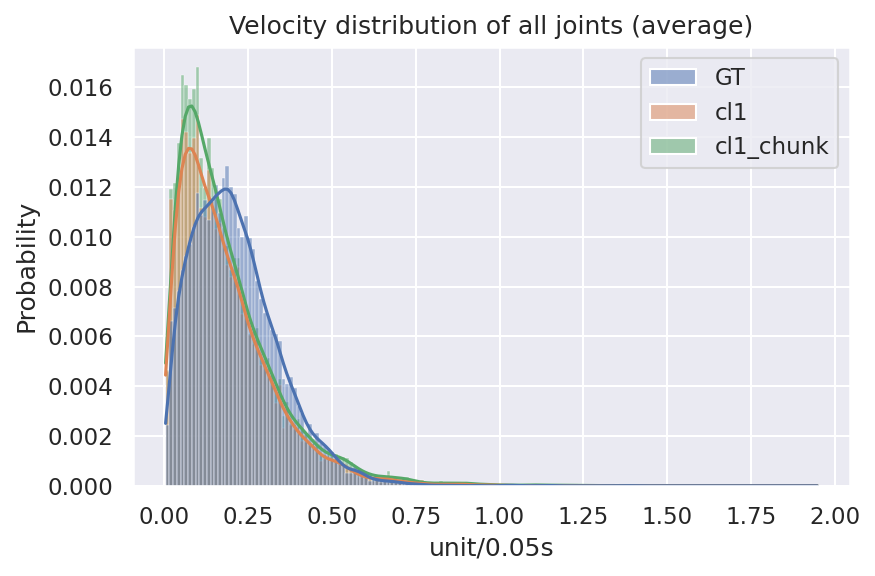

In [19]:
# Plot velocity distribution
fig = plt.figure(dpi=150)

# sns.histplot(data={"GT": motion_vel_avg, "cl0": cl0_output_vel_avg, "cl1": cl1_output_vel_avg, "cl05": cl05_output_vel_avg, "cl01": cl01_output_vel_avg, "cl2": cl2_output_vel_avg},
#     stat='probability', kde=True)

sns.histplot(data={"GT": motion_vel_avg, "cl1": cl1_output_vel_avg, "cl1_chunk": cl1_output_chunk_vel_avg}, stat='probability', kde=True)

plt.title("Velocity distribution of all joints (average)")
plt.xlabel("unit/0.05s")
plt.tight_layout()
plt.show()

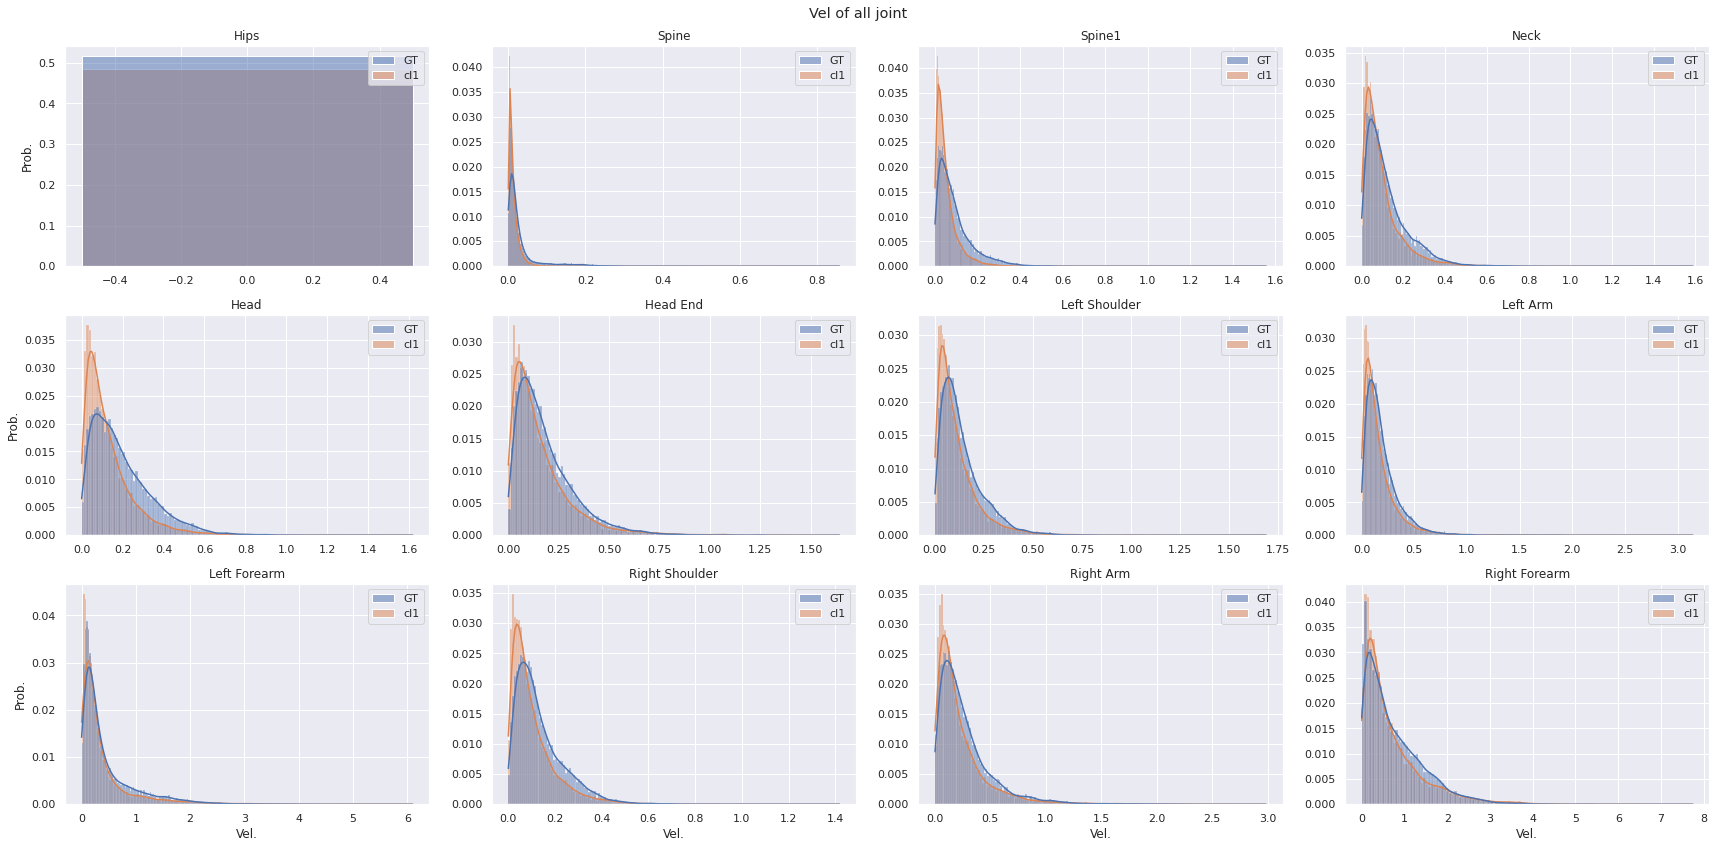

In [12]:
fig, axes = plt.subplots(3, 4, sharex=False, figsize=(24,12))
fig.suptitle('Vel of all joint')

sns.histplot(ax=axes[0][0], data={"GT": motion_vels[0], "cl1": cl1_output_vels[0]}, stat='probability')
axes[0][0].set_title('Hips')
axes[0][0].set_xlabel('')
axes[0][0].set_ylabel('Prob.')

sns.histplot(ax=axes[0][1], data={"GT": motion_vels[1], "cl1": cl1_output_vels[1]}, stat='probability', kde=True)
axes[0][1].set_title('Spine')
axes[0][1].set_xlabel('')
axes[0][1].set_ylabel('')

sns.histplot(ax=axes[0][2], data={"GT": motion_vels[2], "cl1": cl1_output_vels[2]}, stat='probability', kde=True)
axes[0][2].set_title('Spine1')
axes[0][2].set_xlabel('')
axes[0][2].set_ylabel('')

sns.histplot(ax=axes[0][3], data={"GT": motion_vels[3], "cl1": cl1_output_vels[3]}, stat='probability', kde=True)
axes[0][3].set_title('Neck')
axes[0][3].set_xlabel('')
axes[0][3].set_ylabel('')

sns.histplot(ax=axes[1][0], data={"GT": motion_vels[4], "cl1": cl1_output_vels[4]}, stat='probability', kde=True)
axes[1][0].set_title('Head')
axes[1][0].set_xlabel('')
axes[1][0].set_ylabel('Prob.')

sns.histplot(ax=axes[1][1], data={"GT": motion_vels[5], "cl1": cl1_output_vels[5]}, stat='probability', kde=True)
axes[1][1].set_title('Head End')
axes[1][1].set_xlabel('')
axes[1][1].set_ylabel('')

sns.histplot(ax=axes[1][2], data={"GT": motion_vels[6], "cl1": cl1_output_vels[6]}, stat='probability', kde=True)
axes[1][2].set_title('Left Shoulder')
axes[1][2].set_xlabel('')
axes[1][2].set_ylabel('')

sns.histplot(ax=axes[1][3], data={"GT": motion_vels[7], "cl1": cl1_output_vels[7]}, stat='probability', kde=True)
axes[1][3].set_title('Left Arm')
axes[1][3].set_xlabel('')
axes[1][3].set_ylabel('')

sns.histplot(ax=axes[2][0], data={"GT": motion_vels[8], "cl1": cl1_output_vels[8]}, stat='probability', kde=True)
axes[2][0].set_title('Left Forearm')
axes[2][0].set_xlabel('Vel.')
axes[2][0].set_ylabel('Prob.')

sns.histplot(ax=axes[2][1], data={"GT": motion_vels[9], "cl1": cl1_output_vels[9]}, stat='probability', kde=True)
axes[2][1].set_title('Right Shoulder')
axes[2][1].set_xlabel('Vel.')
axes[2][1].set_ylabel('')

sns.histplot(ax=axes[2][2], data={"GT": motion_vels[10], "cl1": cl1_output_vels[10]}, stat='probability', kde=True)
axes[2][2].set_title('Right Arm')
axes[2][2].set_xlabel('Vel.')
axes[2][2].set_ylabel('')

sns.histplot(ax=axes[2][3], data={"GT": motion_vels[11], "cl1": cl1_output_vels[11]}, stat='probability', kde=True)
axes[2][3].set_title('Right Forearm')
axes[2][3].set_xlabel('Vel.')
axes[2][3].set_ylabel('')

plt.tight_layout()
plt.show()

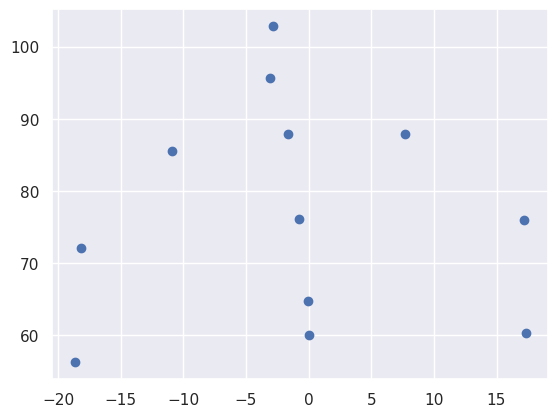

In [ ]:
plt.scatter(motion_list[0][0][::3], motion_list[0][0][1::3])
plt.show()

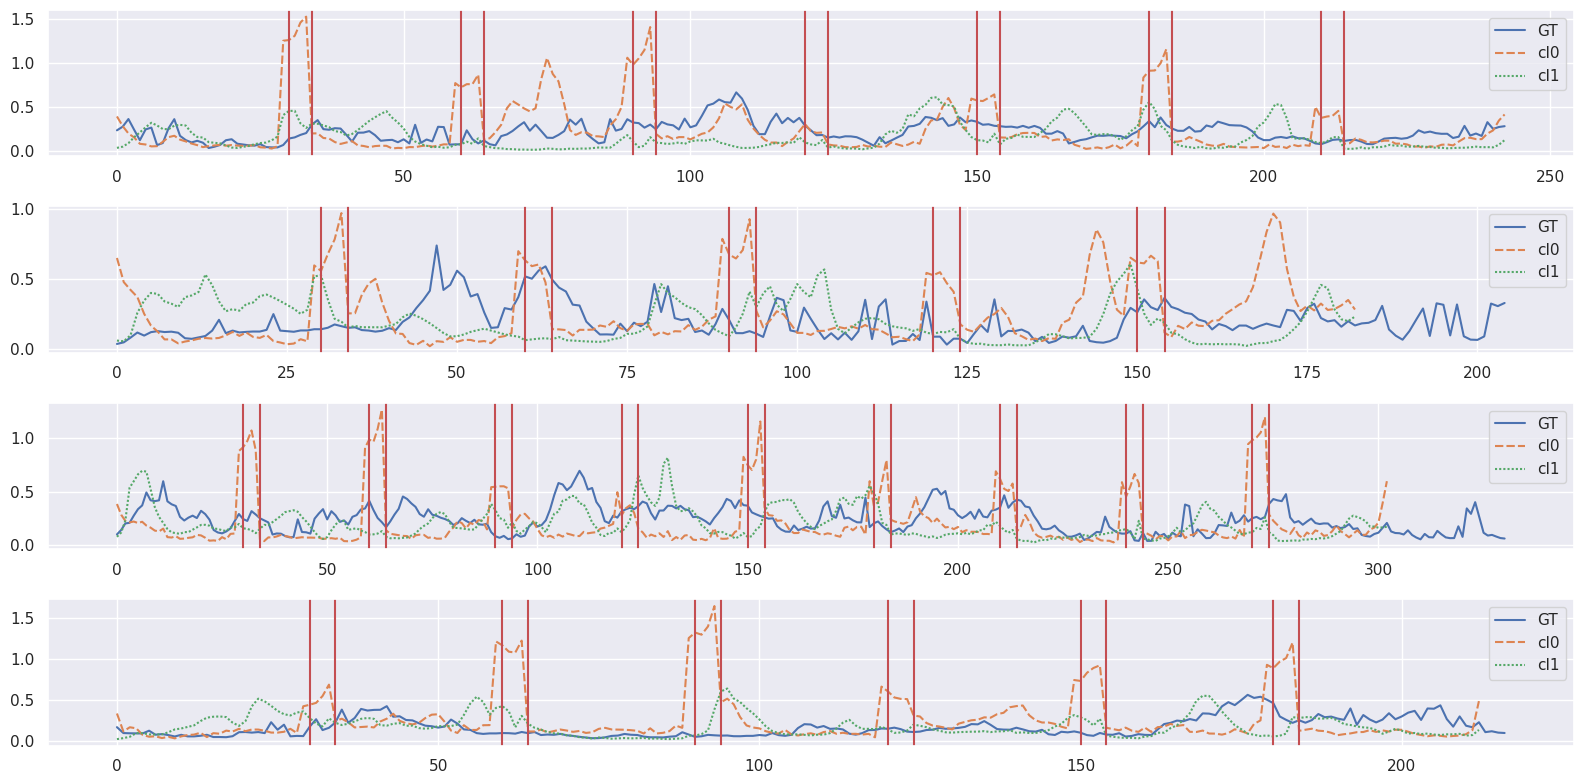

In [13]:
# Vel at all time steps for samples
# red is transition part
fig, axes = plt.subplots(4, 1, figsize=(16,8))

k = 0
motion_vel_seq = np.mean(motion_vel_list[k], axis=-1)
cl0_output_vel_seq = np.mean(cl0_output_vel_list[k], axis=-1)
cl1_output_vel_seq = np.mean(cl1_output_vel_list[k], axis=-1)
sns.lineplot(ax=axes[0], data={"GT": motion_vel_seq, "cl0": cl0_output_vel_seq, "cl1": cl1_output_vel_seq})
for i in range(1, len(cl0_output_vel_seq)//30):
    axes[0].axvline(30*i, c='r')
    axes[0].axvline(30*i+4, c='r')

k = 1
motion_vel_seq = np.mean(motion_vel_list[k], axis=-1)
cl0_output_vel_seq = np.mean(cl0_output_vel_list[k], axis=-1)
cl1_output_vel_seq = np.mean(cl1_output_vel_list[k], axis=-1)
sns.lineplot(ax=axes[1], data={"GT": motion_vel_seq, "cl0": cl0_output_vel_seq, "cl1": cl1_output_vel_seq})
for i in range(1, len(cl0_output_vel_seq)//30):
    axes[1].axvline(30*i, c='r')
    axes[1].axvline(30*i+4, c='r')

k = 4
motion_vel_seq = np.mean(motion_vel_list[k], axis=-1)
cl0_output_vel_seq = np.mean(cl0_output_vel_list[k], axis=-1)
cl1_output_vel_seq = np.mean(cl1_output_vel_list[k], axis=-1)
sns.lineplot(ax=axes[2], data={"GT": motion_vel_seq, "cl0": cl0_output_vel_seq, "cl1": cl1_output_vel_seq})
for i in range(1, len(cl0_output_vel_seq)//30):
    axes[2].axvline(30*i, c='r')
    axes[2].axvline(30*i+4, c='r')

k = 7
motion_vel_seq = np.mean(motion_vel_list[k], axis=-1)
cl0_output_vel_seq = np.mean(cl0_output_vel_list[k], axis=-1)
cl1_output_vel_seq = np.mean(cl1_output_vel_list[k], axis=-1)
sns.lineplot(ax=axes[3], data={"GT": motion_vel_seq, "cl0": cl0_output_vel_seq, "cl1": cl1_output_vel_seq})
for i in range(1, len(cl0_output_vel_seq)//30):
    axes[3].axvline(30*i, c='r')
    axes[3].axvline(30*i+4, c='r')

plt.tight_layout()
plt.show()